<a href="https://www.kaggle.com/code/iamdal/binary-classification-with-a-bank-churn-dataset?scriptVersionId=160640214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="font-family:Garamond;color:#39342F;font-size:16px">Created by: Dalton R. Burton</p>
<p style="font-family:Garamond;color:#39342F;font-size:16px">Project: Kaggle Competion</p>
<p style="font-family:Garamond;color:#39342F;font-size:16px">Date: 25/11/2023</p>

# <center style="color:#40A2D8"> Binary Classification with a Bank Churn Dataset

#### <p style="font-family:Garamond;color:#40A2D8;font-size:16px"><center> by: Dalton R. Burton </center></p>
    
***

# <center style="color:#40A2D8"> Table of Contents

***
    
* [Introduction](#1)
* [Load Data](#2)
* [First look at the data](#3)
* [Data Cleaning](#4)
* [Exploratory Data Analysis](#5)
* [Feature Interactions](#6)
* [Pipeline](#7)
* [Machine Learning](#8)
* [Feature Importance](#9)
* [Voting Classifier](#10)
* [Submission](#11)   

# <center style="color:#40A2D8"><a id = 1>Introduction
***

Customer churn is a mathematical quantitative representation of the rate at which a customer may discontinue <br>
their use of a product or service. 

This metric is essential to businesses as it is a vital indicator of product performance, customer satisfaction,<br>
feasibility and future decisions. A high churn rate prompts a closer examination of product functionality and <br>
customer experience, making it a critical component in assessing and enhancing the long-term viability of a business.


## <p style="color:#40A2D8"><a id = 1>The Question
***

Our goal is to analyze the data and figure out if a customer will curn, therefore...

#### What features are indicative of the rate of churn for bank customers?

## <p style="color:#40A2D8"><a id = 1>About Dataset
    
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. <br>
It contains information on bank customers who either left the bank or continue to be a customer. <br>
The dataset includes the following attributes:<br>
<br>
* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)
    
***

# <center style="color:#40A2D8"><a id = 2>Load Data and Libraries

### Import Libraries

***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import data visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import Classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# Import model selection
from sklearn.model_selection import train_test_split

# Import accuracy metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Import pipeline and preprocessing imputers and encoders
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load datasets to notebook
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


### Notebook Visual Customization

***

In [2]:
# Get CSS root file from github
!wget https://raw.githubusercontent.com/IamDal/IamDal/main/notebookCSS.css -O notebookCSS.css -q

# Load CSS file
from IPython.core.display import HTML
with open('./notebookCSS.css', 'r') as file:
    custom_css = file.read()
HTML(custom_css)

### Plot Visual Customization

***

In [3]:
# Define a color pallette
palette = ['#1A374D', '#406882', '#6998AB', '#B1D0E0',
           '#EEF5FF', '#B4D4FF', '#86B6F6', '#9EB8D9']

# Create a dictionary of RC values for matplotlib
rc = {
    "axes.facecolor": "#FFFFFF",
    "figure.facecolor": "#FFFFFF",
    "axes.edgecolor": "#DDF2FD",
    "grid.color": "#DDF2FD",
    "font.family": "monospace",
    "font.monospace" : "Computer Modern Typewriter",
    "axes.labelcolor": "#1A374D",
    "xtick.color": "#1A374D",
    "ytick.color": "#1A374D",
    "grid.alpha": 0.5,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    "axes.titlesize" : 12,
    "axes.labelsize" : 9,
    "legend.fontsize" : 6,
    "legend.title_fontsize" : 8,
    "axes.titlecolor" : "#1A374D",
    "figure.raise_window" : True,
    "text.color" : "#1A374D"
}

# Set RC values
sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

### Some Useful Functions

***

Here are some useful functions created during the coding of this notebook

In [4]:
def summary(df):
    """
    Displays a dataframe and it's shape as summary
    df = takes a dataframe as input
    returns the summary of the dataframe. ie:
    shape, data types, count,number of missing values,
    percentage of missing values and number of unique
    values
    """
    # Displays shape of Dataframe
    print(f"DataFrame summary:\nNumber of DataFrame columns:\
          {df.shape[1]}\nNumber of DataFrame entries:{df.shape[0]}")
    print("-"*40)
    
    # Creates  a new dataframe
    summary = pd.DataFrame()
    
    # Add a column for datatypes
    summary['Dtype'] = df.dtypes
    
    # Add a column for count
    summary['Count'] = df.count()
    
    # Add a column for count of missing values
    summary['MissingCount'] = df.isnull().sum()
    
    # Add a column for missing percentage
    summary['Missing%%'] = (df.isnull().sum()/traindf.shape[0])*100
    
    # Add a column for count of unique values
    summary['UniqueValues'] = df.nunique()
    
    # Return Dataframe of summary
    return summary


def side_by_side(*args):
    """
    Displays dataframes side by side
    '('Ideally to be used in tandem with 
    the summary function')'
    the other dataframe columns will be 
    renamed.
    """
    # Returns error if less than two dataframes are passed
    if len(args) < 2:
        raise ValueError("At least two DataFrames are required for concatenation.")
    
    # Initialize new dataframe with the first argument
    concatenated_df = summary(args[0])
    
    # Iterate over the elements of the arguments
    for i, arg in enumerate(args[1:]):
        summ = summary(arg)
        
        # Rename columns in dataframe
        summ.columns = 'DF'+ f'{i+1}_' +summ.columns
        
        # Concatenate dataframes
        concatenated_df = pd.concat([concatenated_df,summ], axis = 1)
    return concatenated_df


# Function to get a list of categorical and numerical columns
def get_catnum(df):
    """
    Takes a dataframe(df) and dseparates 
    categorical features and numerical 
    features and returns a list for each set.
    """    
    # Create a dataframe of the unique value count
    condition = pd.DataFrame(df.nunique(),columns=['Unique'])
    
    # Drop features with unique count less than 10
    categorical_features = list(condition[condition < 10].dropna().index)
    
    # Drop categorical features from total features
    numeric_features = list(set(df.select_dtypes(['int64','float64']).columns) - set(categorical_features))
    
    # Return list of categorical and numerical features
    return categorical_features, numeric_features 


# Function to plot numercal features against categorical features
def distribution_view(df,numeric,target):
    
    # Get the number of numeric columns
    features_num = len(numeric)
    
    # Set figure and axes
    fig, axes = plt.subplots(features_num, 3,figsize=(16, features_num * 3), 
                             gridspec_kw = {'hspace': 0.3, 'wspace': 0.4,
                                            'width_ratios': [0.80, 0.50, 0.50]})
    
    # Iterate over the list of numeric features
    for i, num in enumerate(numeric):
        
        # Set axes and creates a KDE plot
        ax = axes[i,0]
        sns.kdeplot(df, x=num, hue=target, palette=palette,
                    shade=True, ax=ax)
        
        # Set axes and creates a violin plot
        ax = axes[i,1]
        sns.stripplot(df, y=num, palette=palette, ax=ax, x='Exited',
                       hue=target,dodge=True)

        
        # Set axes and creates a box plot
        ax = axes[i,2]
        sns.boxplot(df, y=num, x=target, palette=palette, 
                    showfliers=False, notch=False, ax=ax)
        
    # Set title and show plot
    plt.suptitle(f'Distribution Charts of Numerical Features with {target}',y=.9)
    plt.tight_layout()
    plt.show()


# Function to plot numercal features against numerical features
def contiuos_view(df,numeric,target):
    
    # Get the number of numeric features
    number_of_features = len(numeric)
    
    # Set figure and axes
    fig, axes = plt.subplots(1,number_of_features ,figsize = (number_of_features * 4,3), 
                             gridspec_kw = {'hspace': 0.4, 'wspace': 0.4})

    # Iterate over the list of numeric features
    for i, num in enumerate(numeric):
        
        # Set axes and creates a scatterplot
        ax = axes[i]
        sns.scatterplot(df, y=num, x=target, 
                        palette=[palette[0],palette[2]], 
                        ax=ax, hue='Exited')
        
    # Set title and show plot 
    plt.suptitle(f'Distribution Charts of Numerical Features with {target}',y=.95)
    plt.tight_layout()
    plt.show()

    
def feature_importance(models,df):
    
    # Set figure and axes
    fig, axes = plt.subplots(1,len(models),figsize=(20,10),sharey=False,
                            gridspec_kw = {'hspace': 0.2, 'wspace': 0.5})
    
    # Iterate over the list of models
    for i,model in enumerate(models):
        
        # Get the name of the model
        name = type(model.named_steps['model']).__name__
        
        # Get the feature importance values
        feature_value = model.named_steps['model'].feature_importances_
        
        # Get the name of features
        features = pd.get_dummies(df).columns
        
        # Create Dataframe of important feature
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_value})\
                                                .sort_values(by='Importance', ascending=False)
        #feature_importance_df = feature_importance_df
        # Plot Features
        ax = axes[i]
        sns.barplot(feature_importance_df,x='Importance',y='Feature',palette = palette,ax=ax)
        plt.suptitle(f'Feature Importance',y=.92)
        ax.set_title(f'{name} Feature Importance')
        
        # Annotate barplot
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 20),
                        ha='center', va='center', xytext=(18, -12), textcoords='offset points')
            
    # display chart
    plt.tight_layout()
    plt.show()
    
    
def churn_rate_view(df,categorical,target):
    
    if target == 'Exited':
        return
    
    categorical_copy = categorical.copy()
    categorical_copy.remove(target)
    categorical_copy.remove('Exited')

    # Get the number of numeric features
    number_of_features = len(categorical_copy)
    
    # Set figure and axes
    fig, axes = plt.subplots(1,number_of_features ,figsize = (number_of_features * 4,3), 
                             gridspec_kw = {'hspace': 0.4, 'wspace': 0.4})

    # Iterate over the list of numeric features
    for i, cat in enumerate(categorical_copy):

        churn_rate = df.groupby([target,cat],as_index=False)['Exited'].sum()
        churn_count = df.groupby([target,cat],as_index=False)['Exited'].count()
        churn_rate['Rate'] = (churn_rate['Exited'] / churn_count['Exited'])

        # Set axes and creates a scatterplot
        ax = axes[i]
        sns.barplot(churn_rate, y='Rate', x=cat, 
                        palette=palette, 
                        ax=ax, hue=target)
        
    # Set title and show plot 
    plt.suptitle(f'Rate of Churn for customers by {target}',y=.95)
    plt.tight_layout()
    plt.show()

### Load data

***

In [5]:
# Load training dataframe
traindf = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

# Load testing dataframe
testdf = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

# Load additional dataframe to add to training data
data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

# <center><a id = 3>First Look
***

In [6]:
# Display data sets
space = 60*'*'
display(f'{space}Train Dataframe 1{space}',traindf.head(),
        f'{space}Train Dataframe 2{space}',data.head(),
        f'{space}Test Dataframe{space}',testdf.head())

'************************************************************Train Dataframe 1************************************************************'

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

'************************************************************Train Dataframe 2************************************************************'

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

'************************************************************Test Dataframe************************************************************'

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

### Summary of DataFrames

***

In [7]:
# Display a concatonated view of the dataframes' summaries
side_by_side(traindf,testdf,data)\
    .style.background_gradient(cmap='Blues')

DataFrame summary:
Number of DataFrame columns:          14
Number of DataFrame entries:165034
----------------------------------------
DataFrame summary:
Number of DataFrame columns:          13
Number of DataFrame entries:110023
----------------------------------------
DataFrame summary:
Number of DataFrame columns:          14
Number of DataFrame entries:10002
----------------------------------------


# <center><a id = 4> Data Wrangling
***

In [8]:
# Rename inconsistent columns
data = data.rename(columns={'RowNumber':'id'})

# Concatenate Dataframes
traindf = pd.concat([traindf,data],ignore_index=True)

# Set columns to be dropped from database
to_drop = ['id','CustomerId','Surname']

# Drop rows with nan values
traindf = traindf.dropna(axis=0)

# Drop columns
traindf = traindf.drop(columns=to_drop)

# Display summary of new dataframe
summary(traindf).style.background_gradient(cmap='Blues')

DataFrame summary:
Number of DataFrame columns:          11
Number of DataFrame entries:175032
----------------------------------------


# <center><a id = 5> Exploratory Data Analysis
***

### Plotting Numerical and Categorical features
***

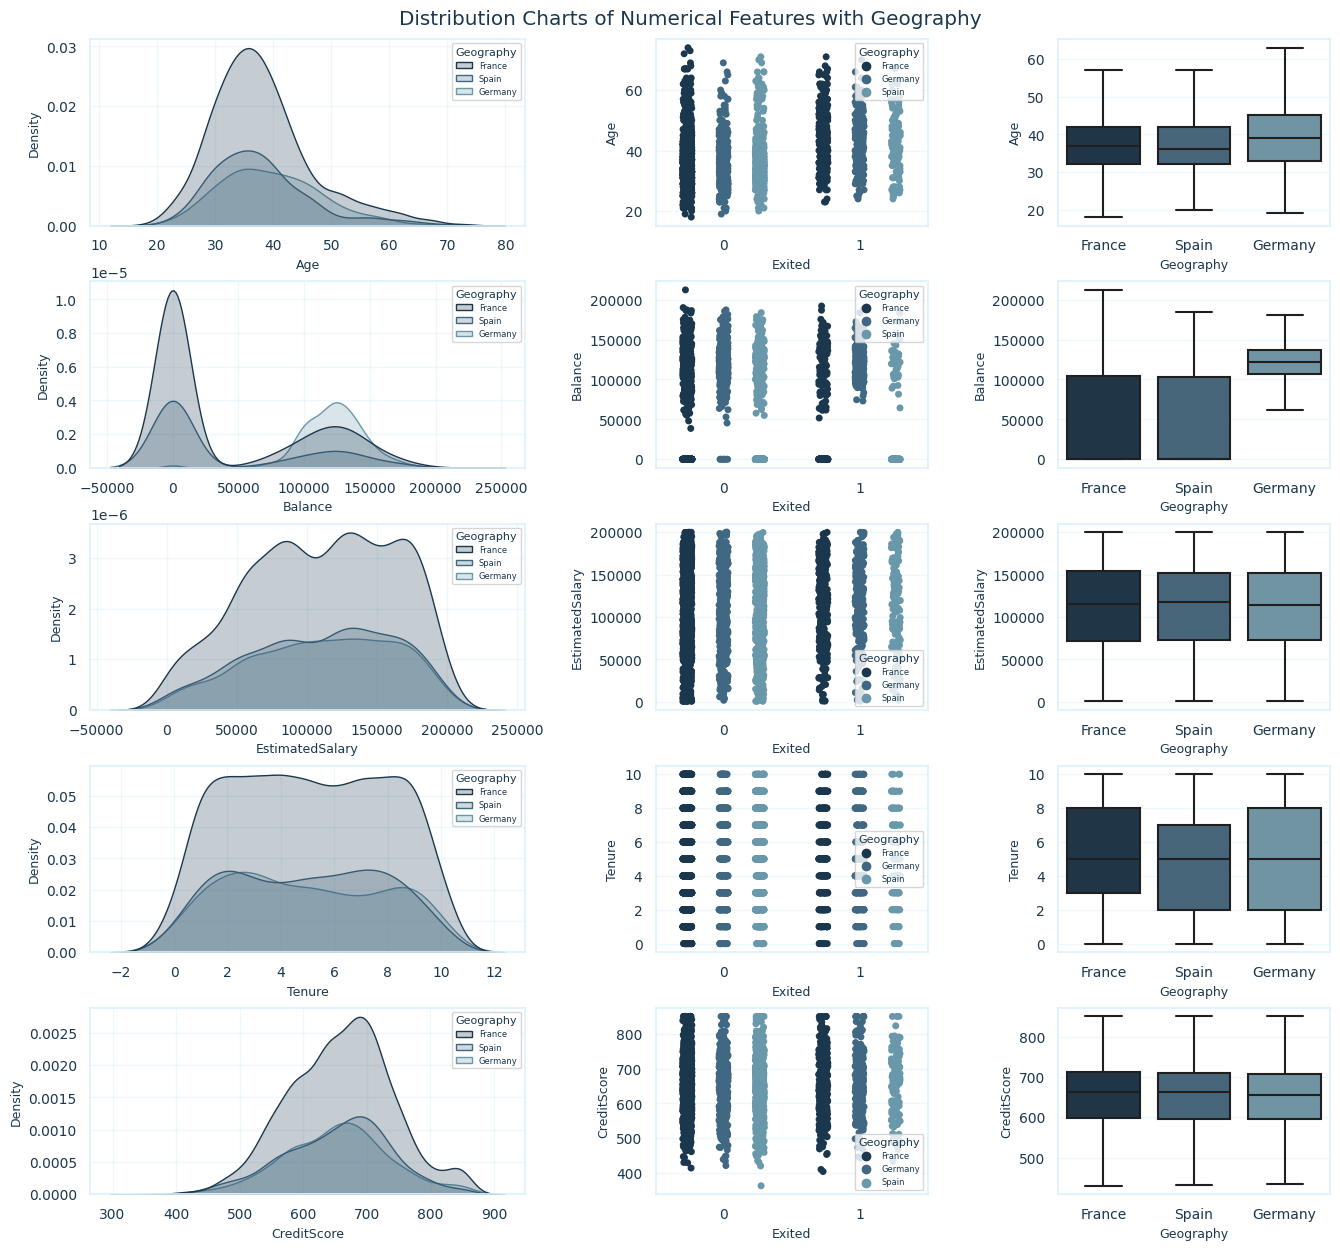

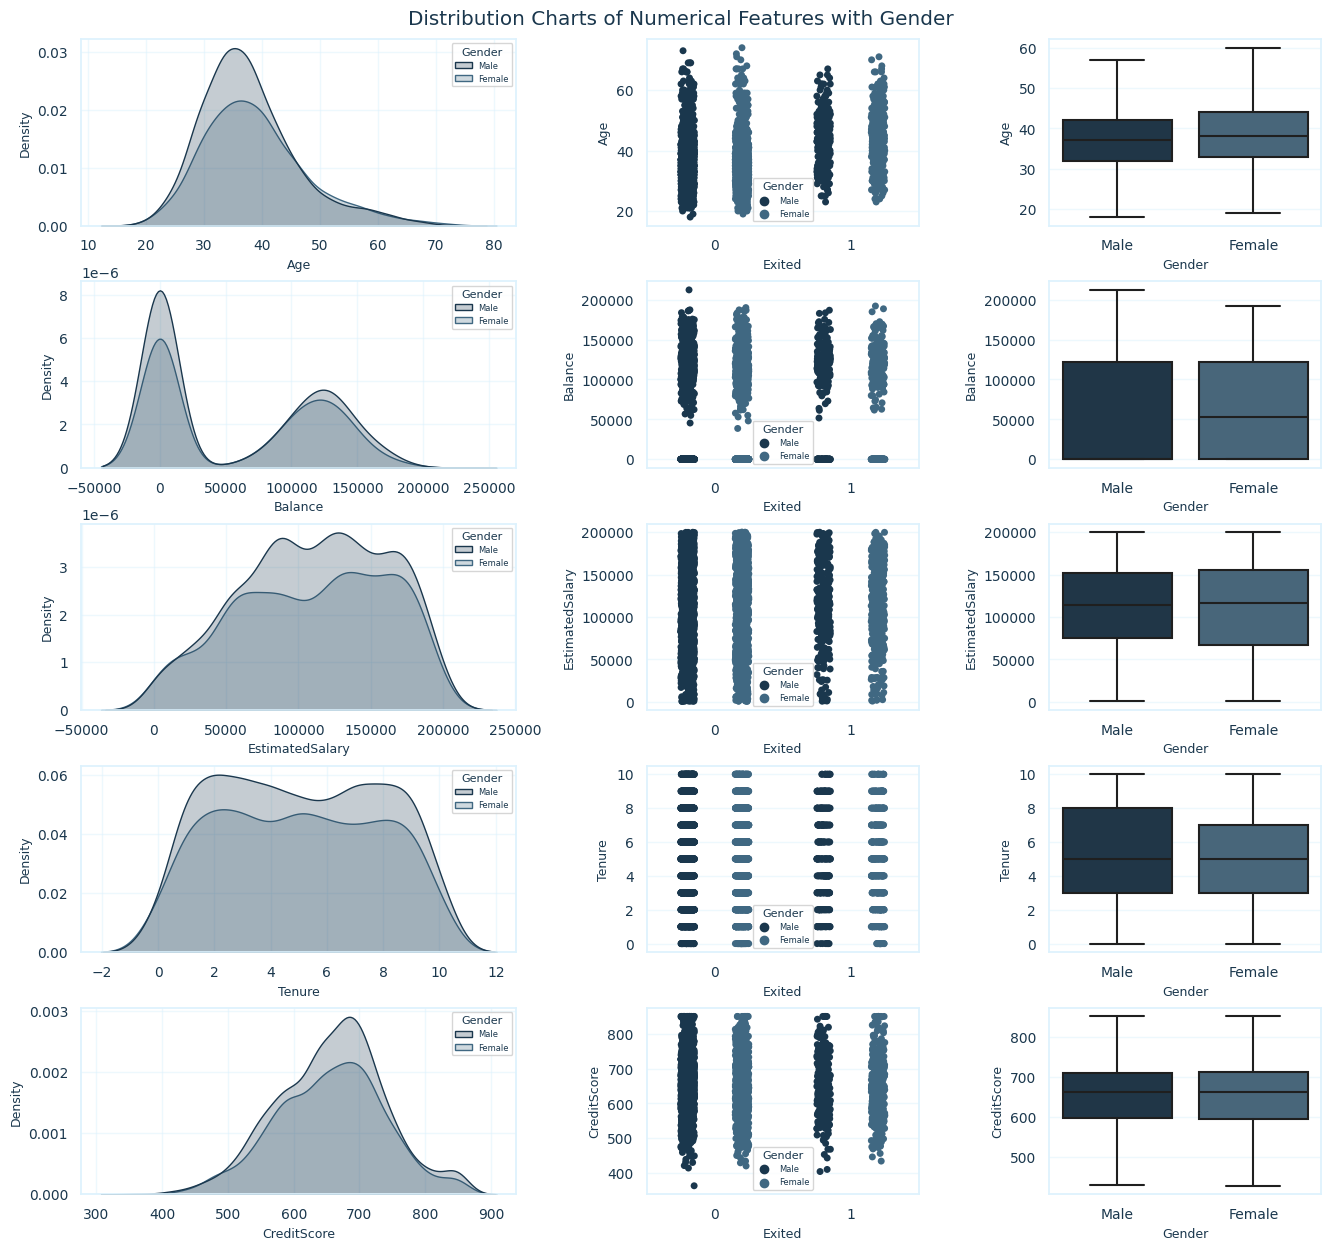

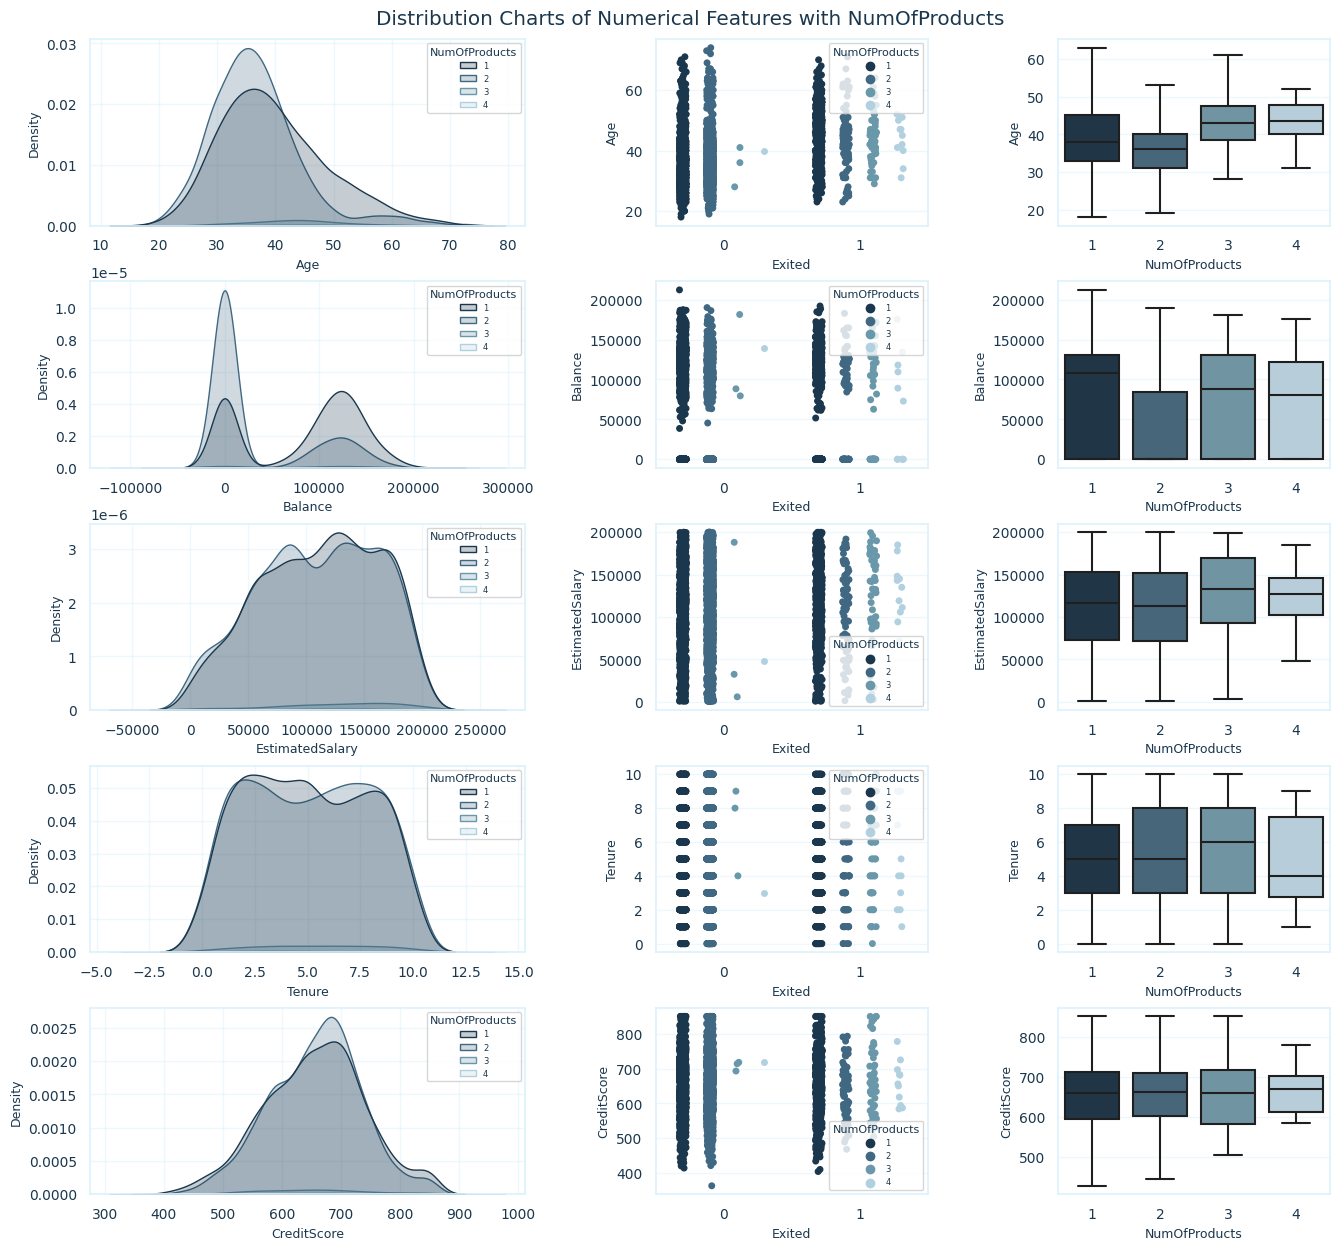

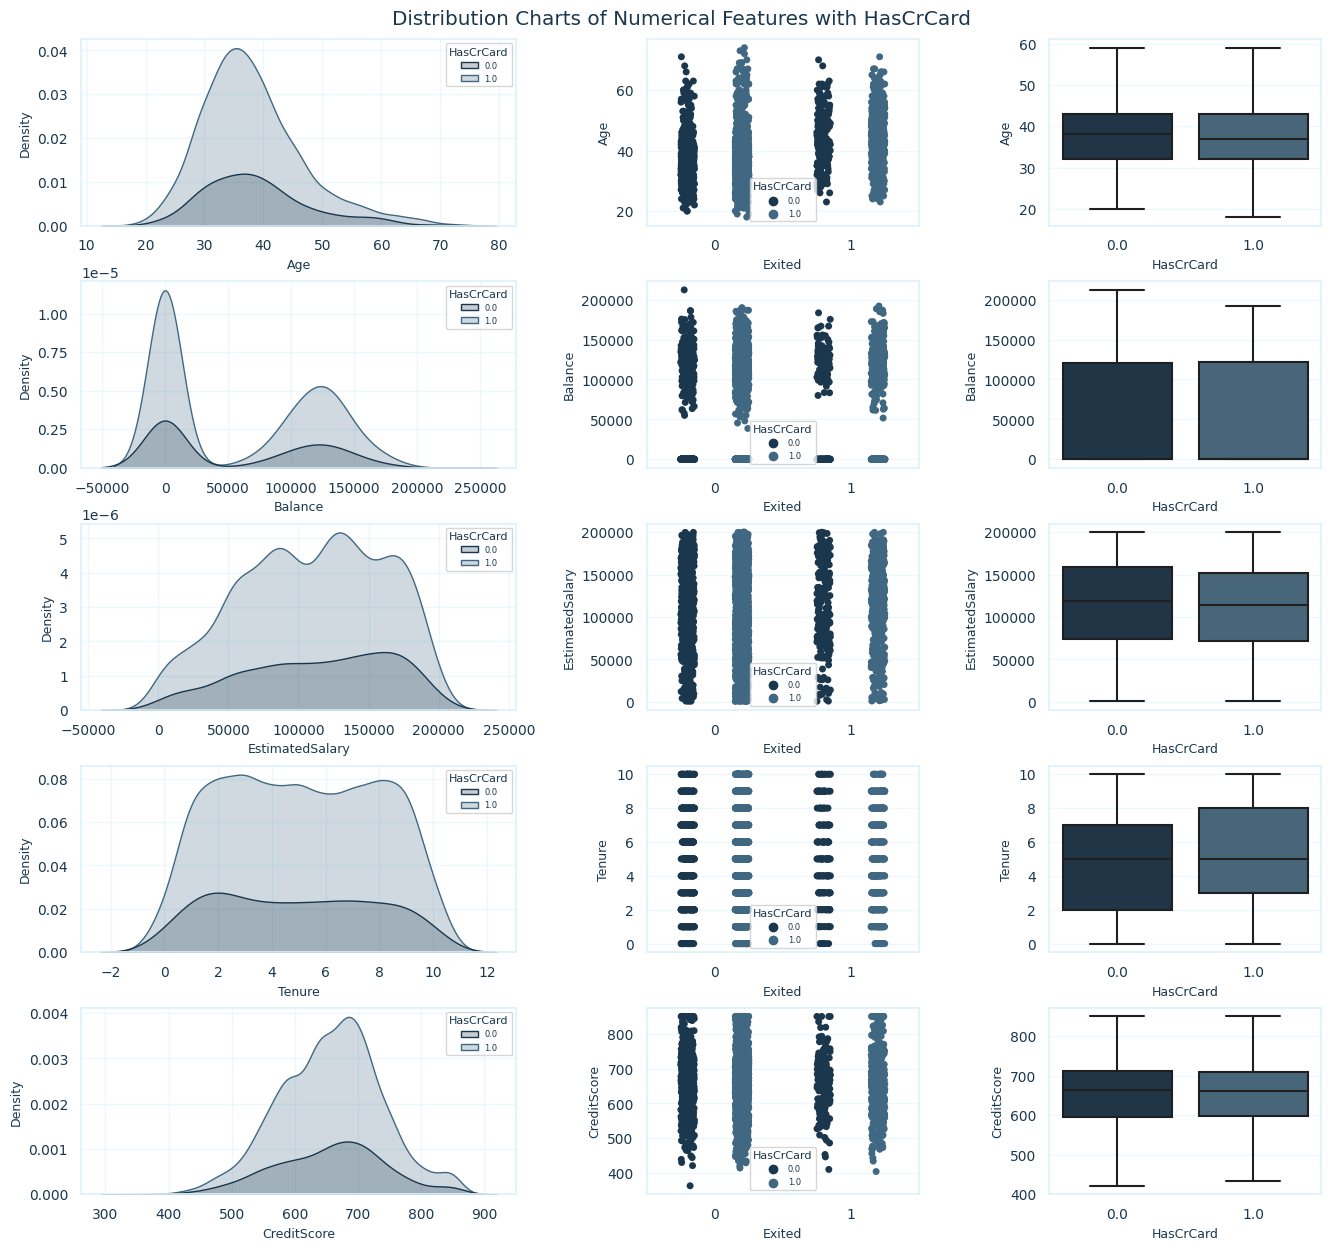

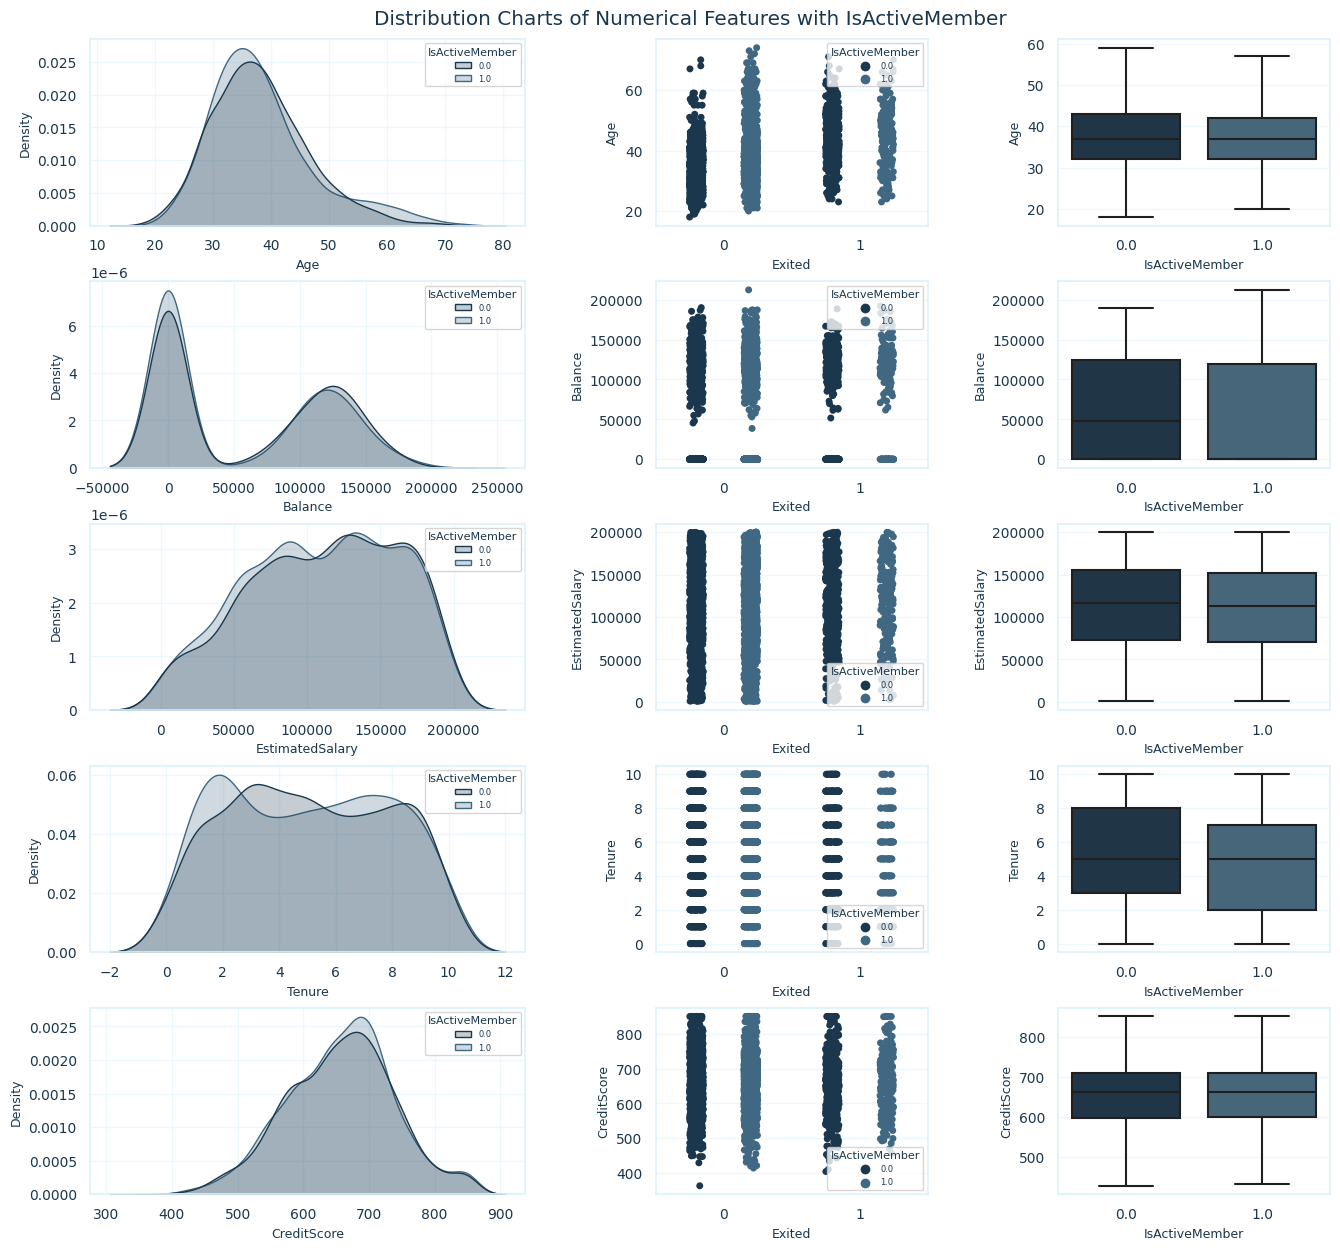

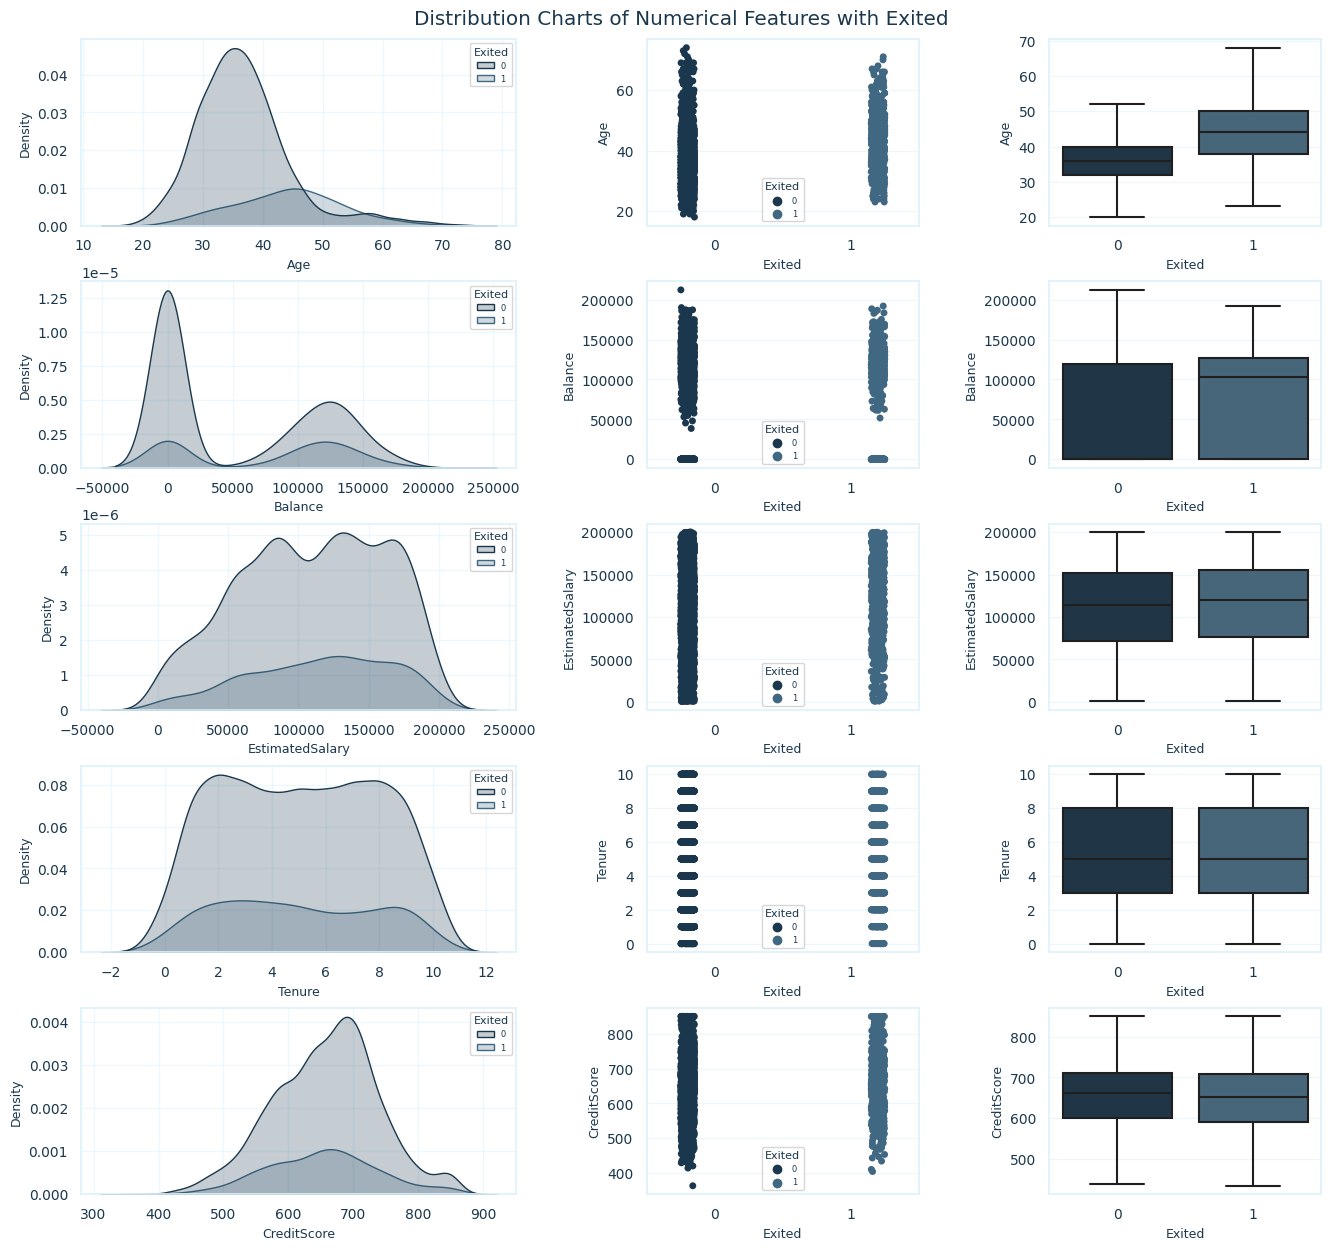

In [9]:
# Get categorical and numerical features
categorical,numeric = get_catnum(traindf)

# Get a sample of the dataframe 
sampled = traindf.sample(3000)

# Iterate over categorical features and plot graphs
for i in categorical:
    distribution_view(sampled,numeric,i)

### Plotting Numerical features
***

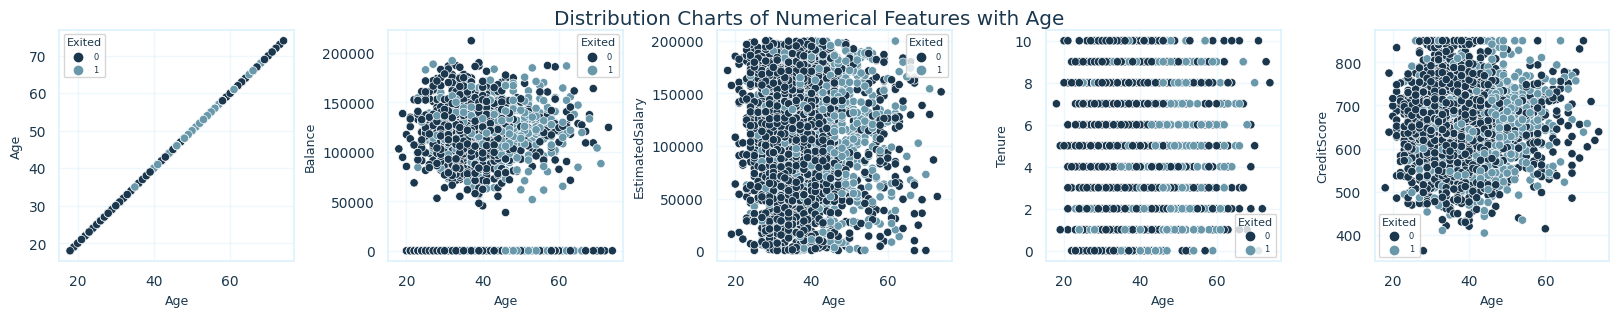

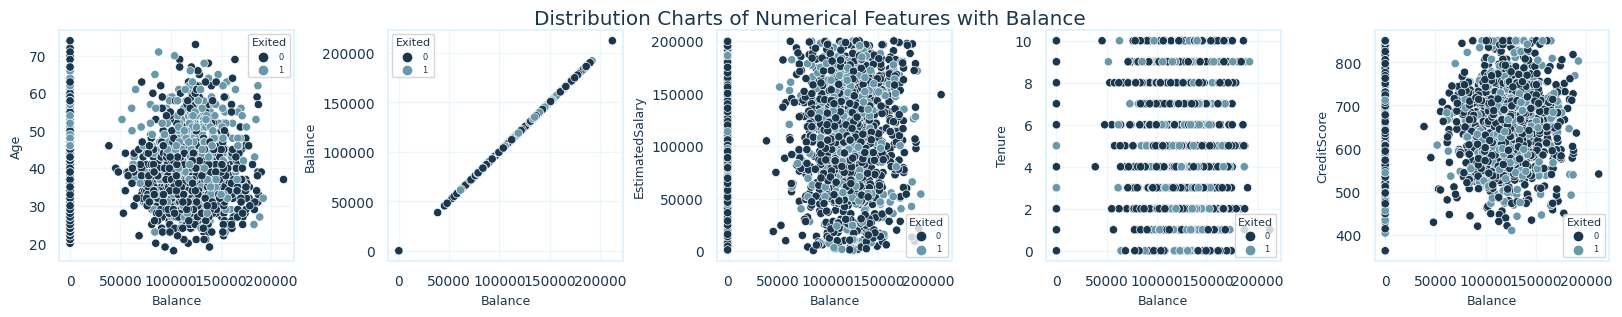

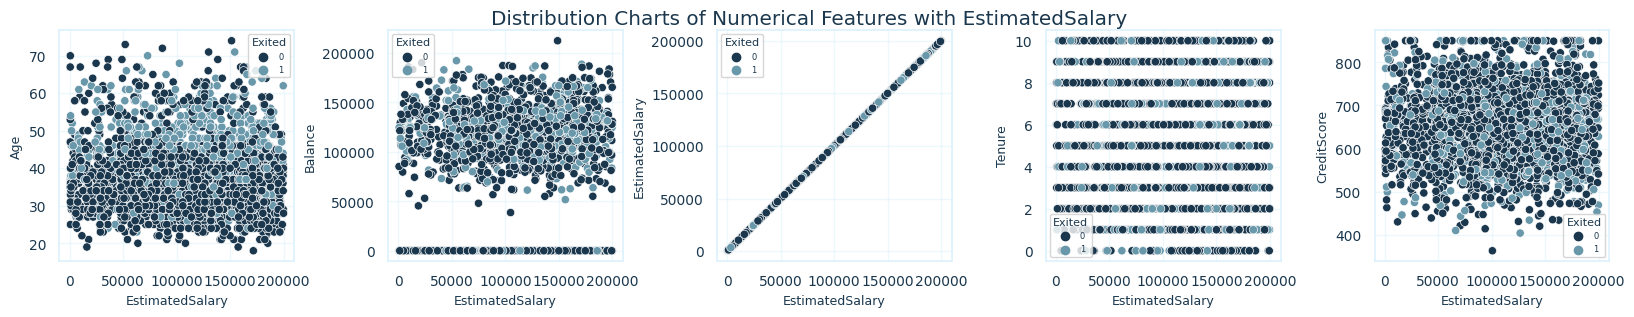

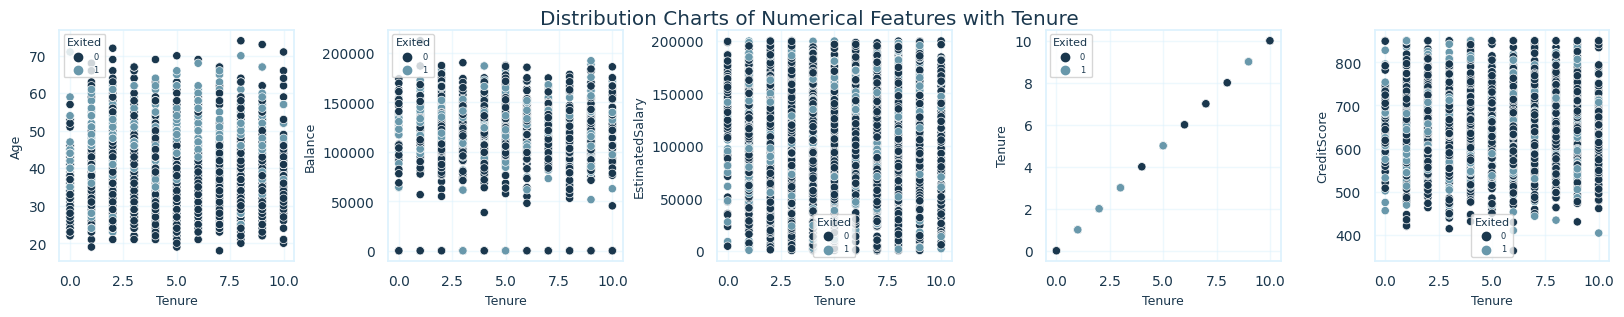

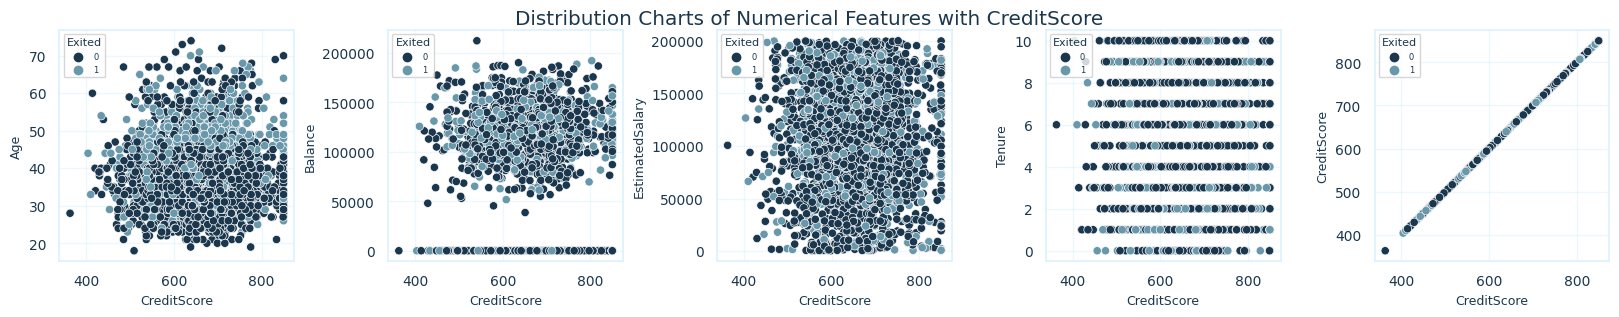

In [10]:
# Iterate over categorical features and plot graphs
for i in numeric:
    contiuos_view(sampled,numeric,i)

### Plotting Categorical features
***

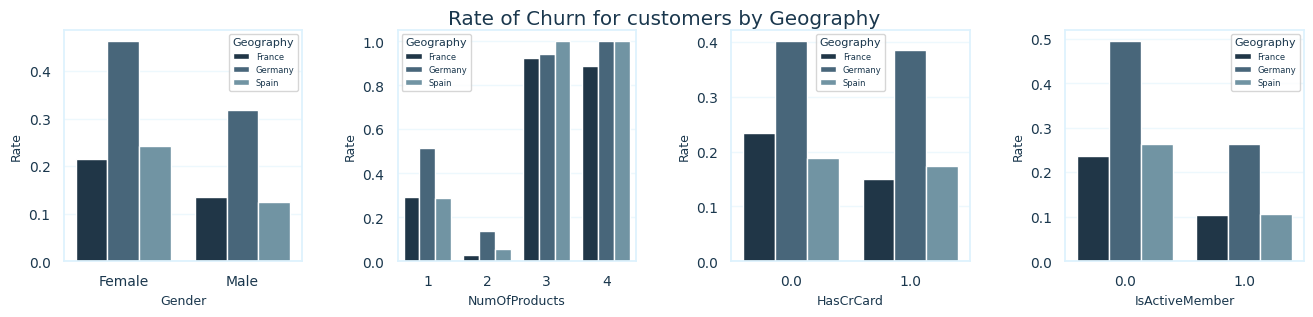

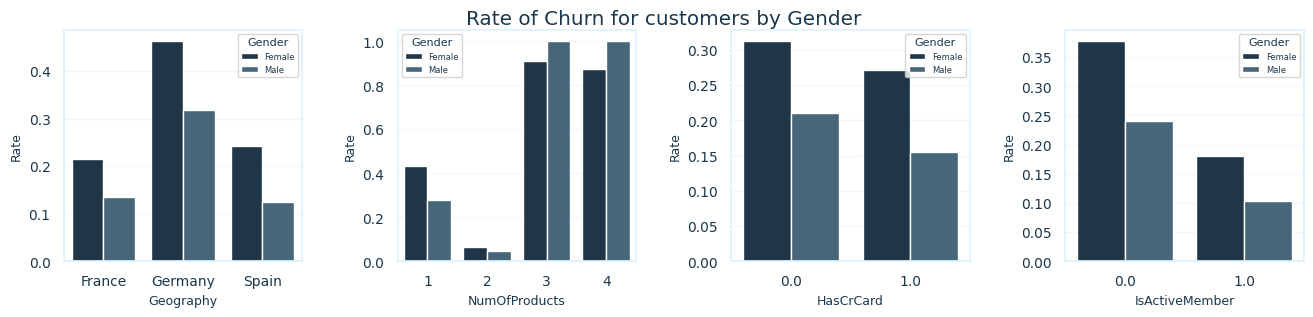

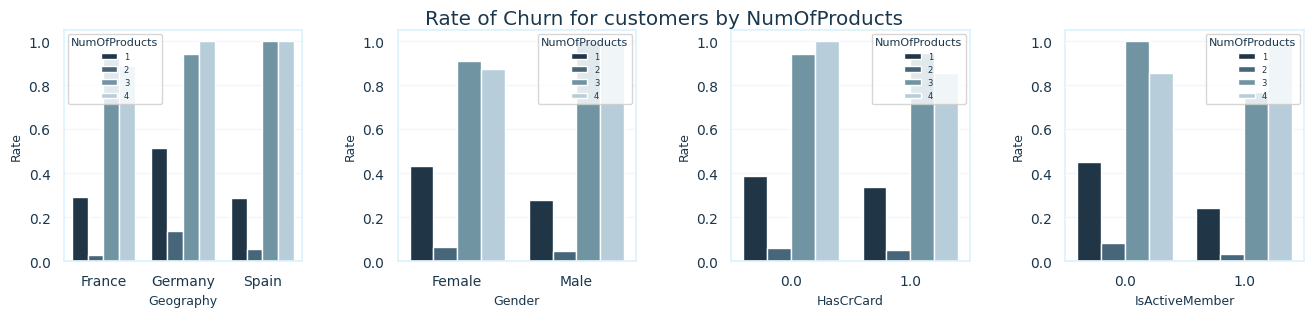

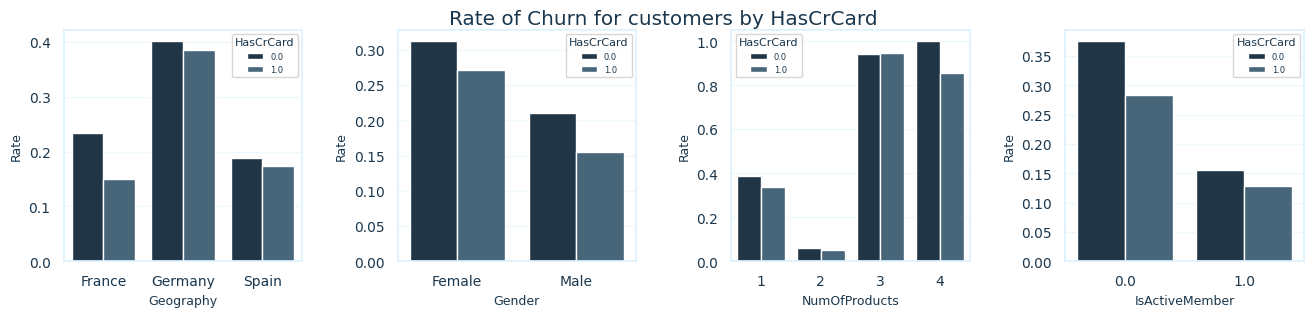

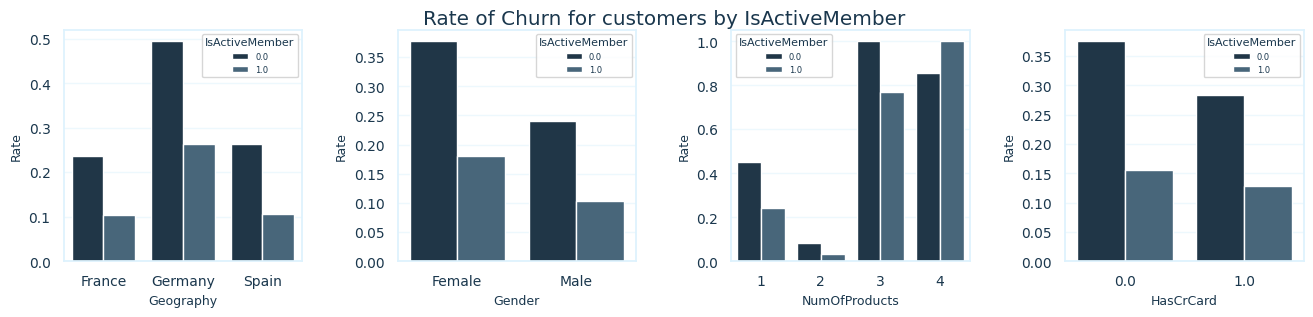

In [11]:
# Iterate over categorical features and plot graphs
for i in categorical:
    churn_rate_view(sampled,categorical,i)

## Observations

1. Age has some correlation with churn, where majority of churn occurs over the age of 40.<br> 
    (It could be the case that there are changes that customers are unaware of <br>
    such as new policies and fees that tend to cause issues when they become aware of them)
2. Number of products also has relationship with customers with more than two products seem to be more likely to churn.<br>
    (Increasing the amount of products probably increases the chance of dissatisfaction, as a customer may hold high expectations)
3. Females have a higher churnrate, especially those from Germany.
4. Inactive members are likely to churn.


# <center><a id = 6> Feature Interactions
***

In [12]:
# Combine geography and gender
traindf["GeoGender"] = traindf['Geography'] + traindf['Gender']
testdf["GeoGender"] = testdf['Geography'] + testdf['Gender']

# Creates a binary column for customer balance
traindf['HasBalance'] = 'N'
traindf.loc[traindf['Balance'] > 0,'HasBalance'] = 'Y'

testdf['HasBalance'] = 'N'
testdf.loc[testdf['Balance'] > 0,'HasBalance'] = 'Y'

# Group customer age 
traindf['Generation'] = traindf['Age'].round(-1)
testdf['Generation'] = testdf['Age'].round(-1)

# Interactions between Active members and number of products
traindf['Active__Prod'] = traindf['NumOfProducts'] * traindf['IsActiveMember']
testdf['Active__Prod'] = testdf['NumOfProducts'] * testdf['IsActiveMember']

# Number of product by generation
traindf['Gen_Prod'] = traindf['Generation'] + traindf['NumOfProducts']
testdf['Gen_Prod'] = testdf['Generation'] + testdf['NumOfProducts']

traindf.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited   GeoGender HasBalance  \
0        1.0             0.0        181449.97       0  FranceMale          N   
1        1.0             1.0         49503.50       0  FranceMale          N   
2        1.0             0.0        184866.69       0  FranceMale          N   
3        1.0             1.0         84560.88       0  FranceMale          Y   
4        1.0             1.0         15068.83       0   SpainMale          N   

   Generation  Active__Prod  Gen_Prod  
0        30.0           0.0      32.0  
1        30.0           2.0      32.0  
2        40.0           0.0      42.0  
3        30.0           1.0      31.0  
4        30.0           2.0      32.0

In [13]:
traindf_encoded = pd.get_dummies(traindf,drop_first = True)
traindf_encoded.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Generation  Active__Prod  \
0             0.0        181449.97       0        30.0           0.0   
1             1.0         49503.50       0        30.0           2.0   
2             0.0        184866.69       0        40.0           0.0   
3             1.0         84560.88       0        30.0           1.0   
4             1.0         15068.83       0        30.0           2.0   

   Gen_Prod  Geography_Germany  Geography_Spain  Gender_Male  \
0      32.0              False            False         True   
1      32.0              False            False         True   
2      42.0              False            False         True   
3      31.0              False            False         True   
4      32.0              False             True         True   

   GeoGender_FranceMale  GeoGender_GermanyFemale  GeoGender_GermanyMale  \
0                  True                    False                  False   
1                  True                    False                  False   
2                  True                    False                  False   
3                  True                    False                  False   
4                 False                    False                  False   

   GeoGender_SpainFemale  GeoGender_SpainMale  HasBalance_Y  
0                  False                False         False  
1                  False                False         False  
2                  False                False         False  
3                  False                False          True  
4                  False                 True         False

In [14]:
traindf_encoded.corr(numeric_only=True)\
.sort_values('Exited').style.background_gradient(cmap='Blues')

In [15]:
traindf.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'GeoGender', 'HasBalance', 'Generation', 'Active__Prod',
       'Gen_Prod'],
      dtype='object')

In [16]:
# List of features 
'''
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Generation',
       'Active__Prod', 'Gen_Prod', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'GeoGender_FranceMale', 'GeoGender_GermanyFemale',
       'GeoGender_GermanyMale', 'GeoGender_SpainFemale', 'GeoGender_SpainMale',
       'HasBalance_Y']
'''
columns = ['Gen_Prod','CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary','Active__Prod',
           'Geography','Generation', 'Gender', 'Age', 'GeoGender']

# Set target feature
y=traindf['Exited']

# Set training features
X = traindf[columns]

# Select Numerical and categorical columns
num = X.select_dtypes(include=['int64', 'float64']).columns
col = X.select_dtypes(include=['object']).columns

# <center><a id = 7> Pipeline
***

In [17]:
# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, col)])

# <center><a id = 7>Training Machine Models
***

In [18]:
# Split training data
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=74)#38 74

# Set hyperparameters for XGBClassifier
XGB = XGBClassifier(**{'n_estimators': 810, 'learning_rate': 0.07921079869615913, 'max_depth': 5,
                            'min_child_weight': 8, 'gamma': 0.27423983829634263, 'random_state': 42, 'objective': 'binary:logistic',
                            'eval_metric': 'auc', 'n_jobs': -1})

# Set hyperparameters for CatBoostClassifier
CATB = CatBoostClassifier(**{'iterations': 830, 'learning_rate': 0.08238714339235984, 'depth': 5,
                                 'l2_leaf_reg': 0.8106903985997884, 'random_state': 42, 'verbose': 0})

# Set hyperparameters for LGBMClassifier
LGBM = LGBMClassifier(**{'n_estimators': 960, 'learning_rate': 0.031725771326186744, 'max_depth': 8, 'min_child_samples': 8, 
                               'subsample': 0.7458307885861184, 'colsample_bytree': 0.5111460378911089, 'random_state': 42})

# Create pipelines
XGB_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGB)])
Cat_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', CATB)])
LGBM_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', LGBM)])


def fit(model):
    model.fit(Xtrain, Ytrain)
    predictions = model.predict_proba(Xtest)[:, 1]
    auc_roc = roc_auc_score(Ytest, predictions)
    return auc_roc

print(f'XGBoostClassifier = {fit(XGB_best)}')
print(f'CatBoostClassifier = {fit(Cat_best)}')
print(f'LGBMClassifier = {fit(LGBM_best)}')

XGBoostClassifier = 0.8908549029116405
CatBoostClassifier = 0.891039627308439
LGBMClassifier = 0.8912346516809413


# <center><a id = 9> Feature Importance
***

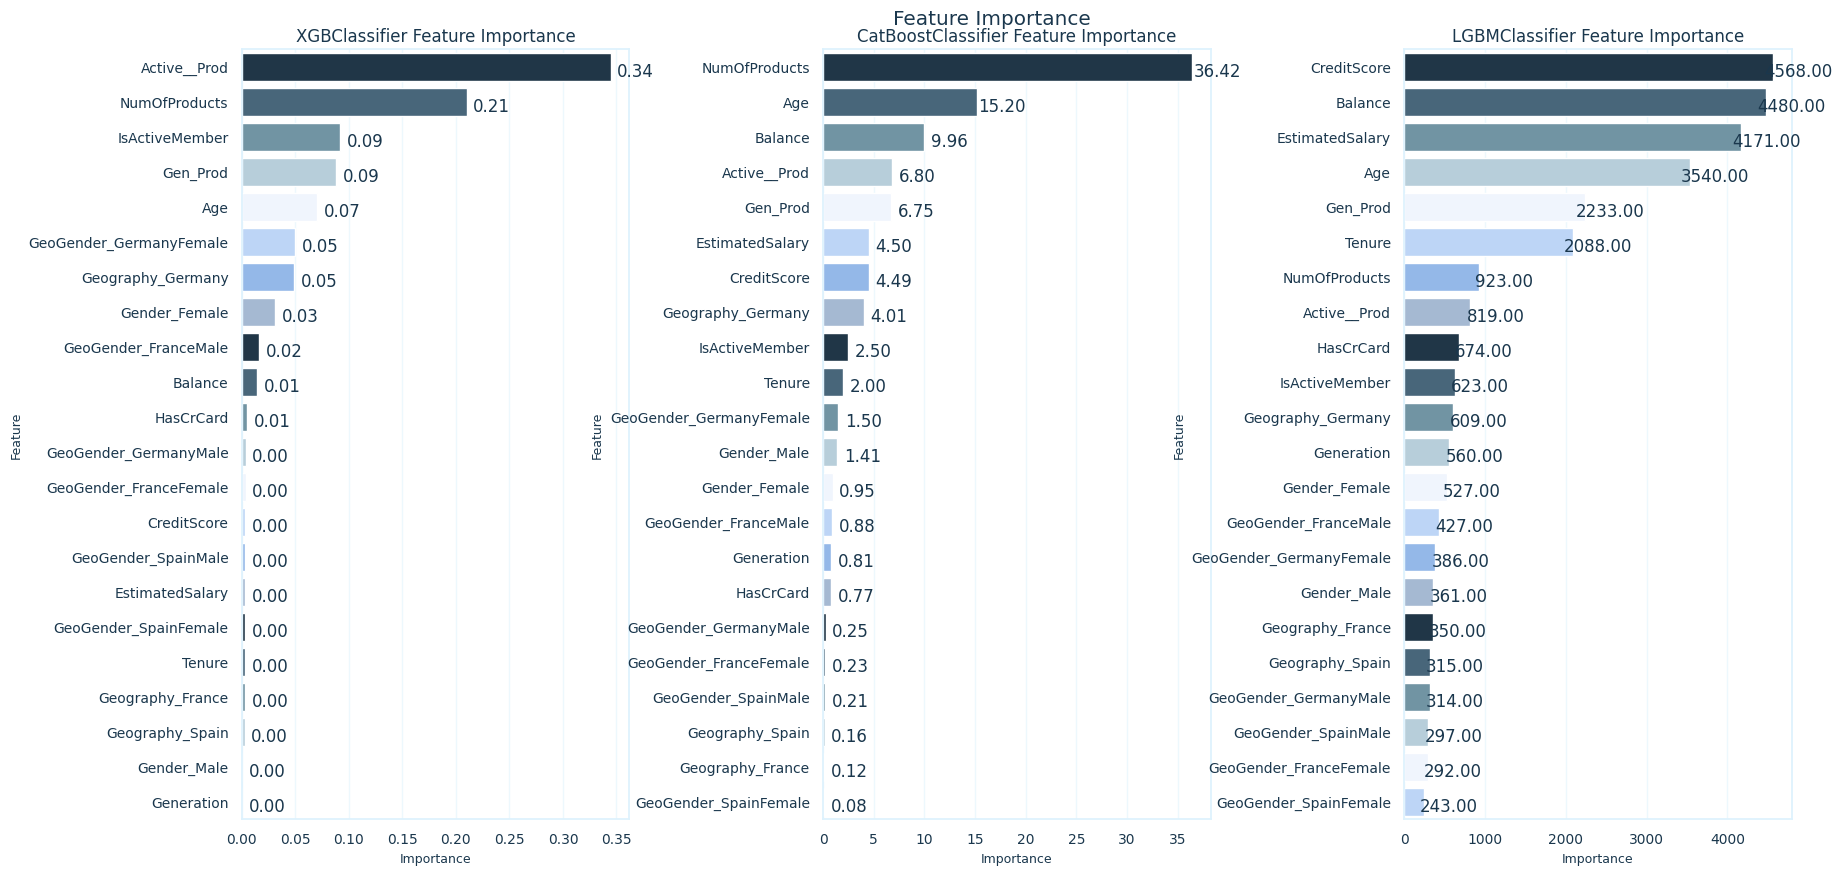

In [19]:
# List of Classifiers
models = [XGB_best,Cat_best,LGBM_best]

# Display feature importance
feature_importance(models,Xtrain)

# <center><a id = 10> Voting Classifier
***

In [20]:
# Create a VotingClassifier with the three XGBoost models
voting = VotingClassifier(estimators=[
    ('Model1', LGBM_best),
    ('Model2', XGB_best),
    ('Model3', Cat_best)
], voting='soft', weights = [0.5, 0.3, 0.2], flatten_transform=True)

voting.fit(Xtrain, Ytrain)

predictions = voting.predict_proba(Xtest)[:, 1]
predict = voting.predict(Xtest)

auc_roc = roc_auc_score(Ytest, predictions)
acuu = accuracy_score(Ytest, predict) 
auc_roc, acuu

(0.8915279816827992, 0.8679406975747708)

# <center><a id = 11> Submission
***

In [21]:
voting.fit(X, y)

pred = voting.predict_proba(testdf[columns])[:, 1]
output = pd.DataFrame({'id': testdf.id, 'Exited': pred})
output.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [22]:
output.head()

id    Exited
0  165034  0.030555
1  165035  0.828761
2  165036  0.025114
3  165037  0.229497
4  165038  0.343218